# Setting up MV

In [3]:
from model.master_transmuter import *
from scrape.scraper import *
from query import *
import unit_tests
import pandas as pd
import numpy as np

In [4]:
mythic_df = pd.read_csv("data/all_vintage_cards-mythic_recent.csv")
rare_df = pd.read_csv("data/all_vintage_cards-rare_recent.csv")
print('Mythic cards: {}'.format(mythic_df.shape[0]))
print('Rare cards: {}'.format(rare_df.shape[0]))

Mythic cards: 568
Rare cards: 4215


In [5]:
mythic_df.sample(10)

,Unnamed: 0,id,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,set,color_identity,colors,reprint,layout,legalities,timestamp,price
71,71,78d47cc7-2849-432e-9bcd-6b97023f1969,Majestic Myriarch,Hour of Devastation,Creature — Chimera,{4}{G},mythic,Majestic Myriarch's power and toughness are ea...,*,*,NaN,5.0,hou,['G'],['G'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542025610106,0.5
561,561,ce89ded2-db31-43c0-b00c-999d5d3fa5c6,Sarkhan Vol,Shards of Alara,Legendary Planeswalker — Sarkhan,{2}{R}{G},mythic,+1: Creatures you control get +1/+1 and gain h...,NaN,NaN,4,4.0,ala,"['G', 'R']","['G', 'R']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542096000000,7.3
374,374,03032d89-caca-43ff-b2ea-028e376c829c,Surrak Dragonclaw,Khans of Tarkir,Legendary Creature — Human Warrior,{2}{G}{U}{R},mythic,Flash\r\r\nThis spell can't be countered.\r\r\...,6,6,NaN,5.0,ktk,"['G', 'R', 'U']","['G', 'R', 'U']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542039685732,0.5
46,46,6a5a6f7b-149d-46d3-9814-d38a302db17c,"Huatli, Dinosaur Knight",Ixalan,Legendary Planeswalker — Huatli,{4}{R}{W},mythic,+2: Put two +1/+1 counters on up to one target...,NaN,NaN,4,6.0,xln,"['R', 'W']","['R', 'W']",False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542047055733,8.0
150,150,1df70ef3-8919-43ac-9317-23548437a181,"Skysovereign, Consul Flagship",Kaladesh,Legendary Artifact — Vehicle,{5},mythic,"Flying\r\r\nWhenever Skysovereign, Consul Flag...",6,5,NaN,5.0,kld,[],[],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542091202302,0.3
99,99,2b49dfb7-dbe7-4a2b-b9de-c620a0db2e47,Tarmogoyf,Modern Masters 2017,Creature — Lhurgoyf,{1}{G},mythic,Tarmogoyf's power is equal to the number of ca...,*,1+*,NaN,2.0,mm3,['G'],['G'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542084345120,49.0
45,45,aff10db6-f9bf-4fc8-b3ef-c4c11f192f53,Archangel of Thune,Iconic Masters,Creature — Angel,{3}{W}{W},mythic,Flying\r\r\nLifelink (Damage dealt by this cre...,3,4,NaN,5.0,ima,['W'],['W'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542046292825,10.5
506,506,6be9b1d5-9ab8-4adb-ba54-2c0117e842fa,Mox Opal,Scars of Mirrodin,Legendary Artifact,{0},mythic,Metalcraft — {T}: Add one mana of any color. A...,NaN,NaN,NaN,0.0,som,[],[],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542096000000,85.0
464,464,b2cce2d4-3944-4ff0-98e8-80f19697f108,"Isperia, Supreme Judge",Return to Ravnica,Legendary Creature — Sphinx,{2}{W}{W}{U}{U},mythic,Flying\r\r\nWhenever a creature attacks you or...,6,4,NaN,6.0,rtr,"['U', 'W']","['U', 'W']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542080908141,0.5
69,69,4e0c1d0a-2651-4961-8b70-ff78093732ce,The Locust God,Hour of Devastation,Legendary Creature — God,{4}{U}{R},mythic,"Flying\r\r\nWhenever you draw a card, create a...",4,4,NaN,6.0,hou,"['R', 'U']","['R', 'U']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542025610107,4.8


In [6]:
clean_mythic_df = mythic_df[~pd.isnull(mythic_df['price'])]
clean_rare_df = rare_df[~pd.isnull(rare_df['price'])]

In [7]:
clean_mythic_df.describe()

,Unnamed: 0,cmc,timestamp,price
count,568.000000,568.000000,5.680000e+02,568.000000
mean,283.500000,4.554577,1.539819e+12,23.024120
std,164.111751,2.336848,4.992627e+09,50.145228
min,0.000000,0.000000,1.523362e+12,0.200000
25%,141.750000,3.000000,1.542027e+12,1.100000
50%,283.500000,5.000000,1.542058e+12,4.000000
75%,425.250000,6.000000,1.542087e+12,14.325000
max,567.000000,12.000000,1.542101e+12,450.000000


In [8]:
clean_rare_df.describe()

,Unnamed: 0,loyalty,cmc,timestamp,price
count,4215.000000,4.000000,4215.000000,4.215000e+03,4215.000000
mean,2107.000000,4.500000,3.927402,1.540199e+12,6.058197
std,1216.910021,1.290994,2.059381,6.214516e+09,37.014310
min,0.000000,3.000000,0.000000,1.441591e+12,0.100000
25%,1053.500000,3.750000,3.000000,1.542026e+12,0.200000
50%,2107.000000,4.500000,4.000000,1.542084e+12,0.500000
75%,3160.500000,5.250000,5.000000,1.542096e+12,2.500000
max,4214.000000,6.000000,16.000000,1.542108e+12,1000.000000


## Price EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

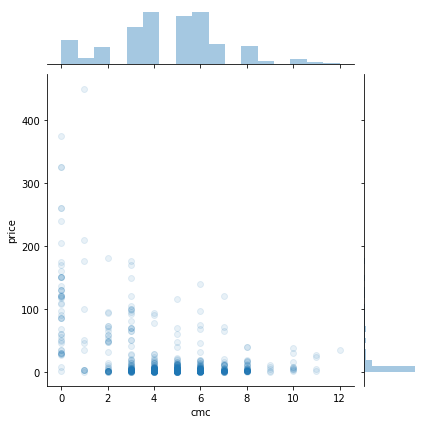

In [10]:
sns.jointplot(clean_mythic_df['cmc'], clean_mythic_df['price'], joint_kws={'alpha':0.1})

(0, 80)

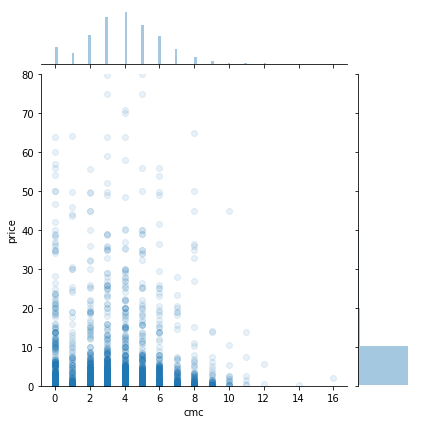

In [11]:
sns.jointplot(clean_rare_df['cmc'].astype('int'), clean_rare_df['price'], joint_kws={'alpha':0.1}, marginal_kws={'bins':100})
plt.ylim(0,80)

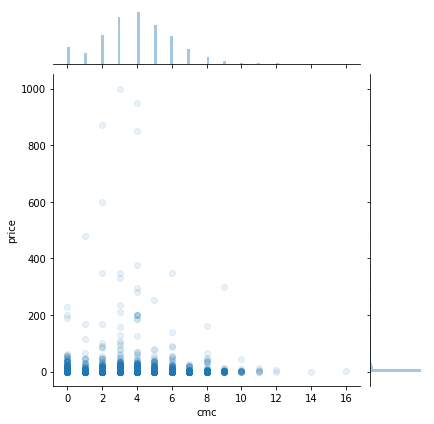

In [12]:
sns.jointplot(clean_rare_df['cmc'].astype('int'), clean_rare_df['price'], joint_kws={'alpha':0.1}, marginal_kws={'bins':100})

### TRANSFORM

In [13]:
aberrant_researcher = CreatureFeatureTransformer()

In [14]:
perfected_form = aberrant_researcher.transform(clean_mythic_df)

In [15]:
perfected_form.sample(10)

,Unnamed: 0,id,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,...,colors,reprint,layout,legalities,timestamp,price,pt_type,p:t,avg_pt,cmc:apt
371,371,c410d530-e9fc-4dc0-a4bd-70bd70aaf0c7,Jazal Goldmane,Commander 2014,Legendary Creature — Cat Warrior,{2}{W}{W},mythic,First strike\r\r\n{3}{W}{W}: Attacking creatur...,4,4,...,['W'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542088892988,0.7,static,1.00,4.0,1.000000
548,548,48ee3939-bc12-4275-a446-9de36f0b4672,"Nicol Bolas, Planeswalker",Conflux,Legendary Planeswalker — Bolas,{4}{U}{B}{B}{R},mythic,+3: Destroy target noncreature permanent.\r\r\...,0,0,...,"['B', 'R', 'U']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542096000000,4.8,none,NaN,NaN,NaN
272,272,1192f7a9-102e-4b3a-b154-18c8eb332217,"Ulamog, the Ceaseless Hunger",Battle for Zendikar,Legendary Creature — Eldrazi,{10},mythic,"When you cast this spell, exile two target per...",10,10,...,[],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542058932741,15.7,static,1.00,10.0,1.000000
331,331,192452f8-93c2-4a20-a52b-0093741a9e45,Sarkhan Unbroken,Dragons of Tarkir,Legendary Planeswalker — Sarkhan,{2}{G}{U}{R},mythic,"+1: Draw a card, then add one mana of any colo...",0,0,...,"['G', 'R', 'U']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542064786702,6.1,none,NaN,NaN,NaN
554,554,16691f25-8d6f-4edd-84ad-3209e8a74cf3,Thornling,Conflux,Creature — Elemental Shapeshifter,{3}{G}{G},mythic,{G}: Thornling gains haste until end of turn.\...,4,4,...,['G'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542096000000,1.4,static,1.00,4.0,1.250000
40,40,416d2d51-8f29-4e95-b037-e8c32b081e6c,Mana Drain,Iconic Masters,Instant,{U}{U},mythic,Counter target spell. At the beginning of your...,0,0,...,['U'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542046292831,48.4,none,NaN,NaN,NaN
152,152,94b38464-39cd-4ee6-b9bf-a0bc1e128d9a,Saheeli Rai,Kaladesh,Legendary Planeswalker — Saheeli,{1}{U}{R},mythic,+1: Scry 1. Saheeli Rai deals 1 damage to each...,0,0,...,"['R', 'U']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542042410098,4.3,none,NaN,NaN,NaN
175,175,9cc7bed9-863a-46a4-85db-4c5608542363,Pithing Needle,Kaladesh Inventions,Artifact,{1},mythic,"As Pithing Needle enters the battlefield, choo...",0,0,...,[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1528417917077,100.0,none,NaN,NaN,NaN
494,494,bd46fc9f-5b92-44d7-8940-2f39b0962b8f,"Jin-Gitaxias, Core Augur",New Phyrexia,Legendary Creature — Praetor,{8}{U}{U},mythic,"Flash\r\r\nAt the beginning of your end step, ...",5,4,...,['U'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542096000000,6.9,static,1.25,4.5,2.222222
377,377,f210adb7-b389-4672-a3eb-0ced9bfe190c,"Narset, Enlightened Master",Khans of Tarkir,Legendary Creature — Human Monk,{3}{U}{R}{W},mythic,"First strike, hexproof\r\r\nWhenever Narset, E...",3,2,...,"['R', 'U', 'W']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542039685729,0.6,static,1.50,2.5,2.400000


In [16]:
perfected_form[perfected_form['pt_type']=='static'].columns

Index(['Unnamed: 0', 'id', 'cardname', 'setname', 'type_line', 'mana_cost',
       'rarity', 'oracle_text', 'power', 'toughness', 'loyalty', 'cmc', 'set',
       'color_identity', 'colors', 'reprint', 'layout', 'legalities',
       'timestamp', 'price', 'pt_type', 'p:t', 'avg_pt', 'cmc:apt'],
      dtype='object')

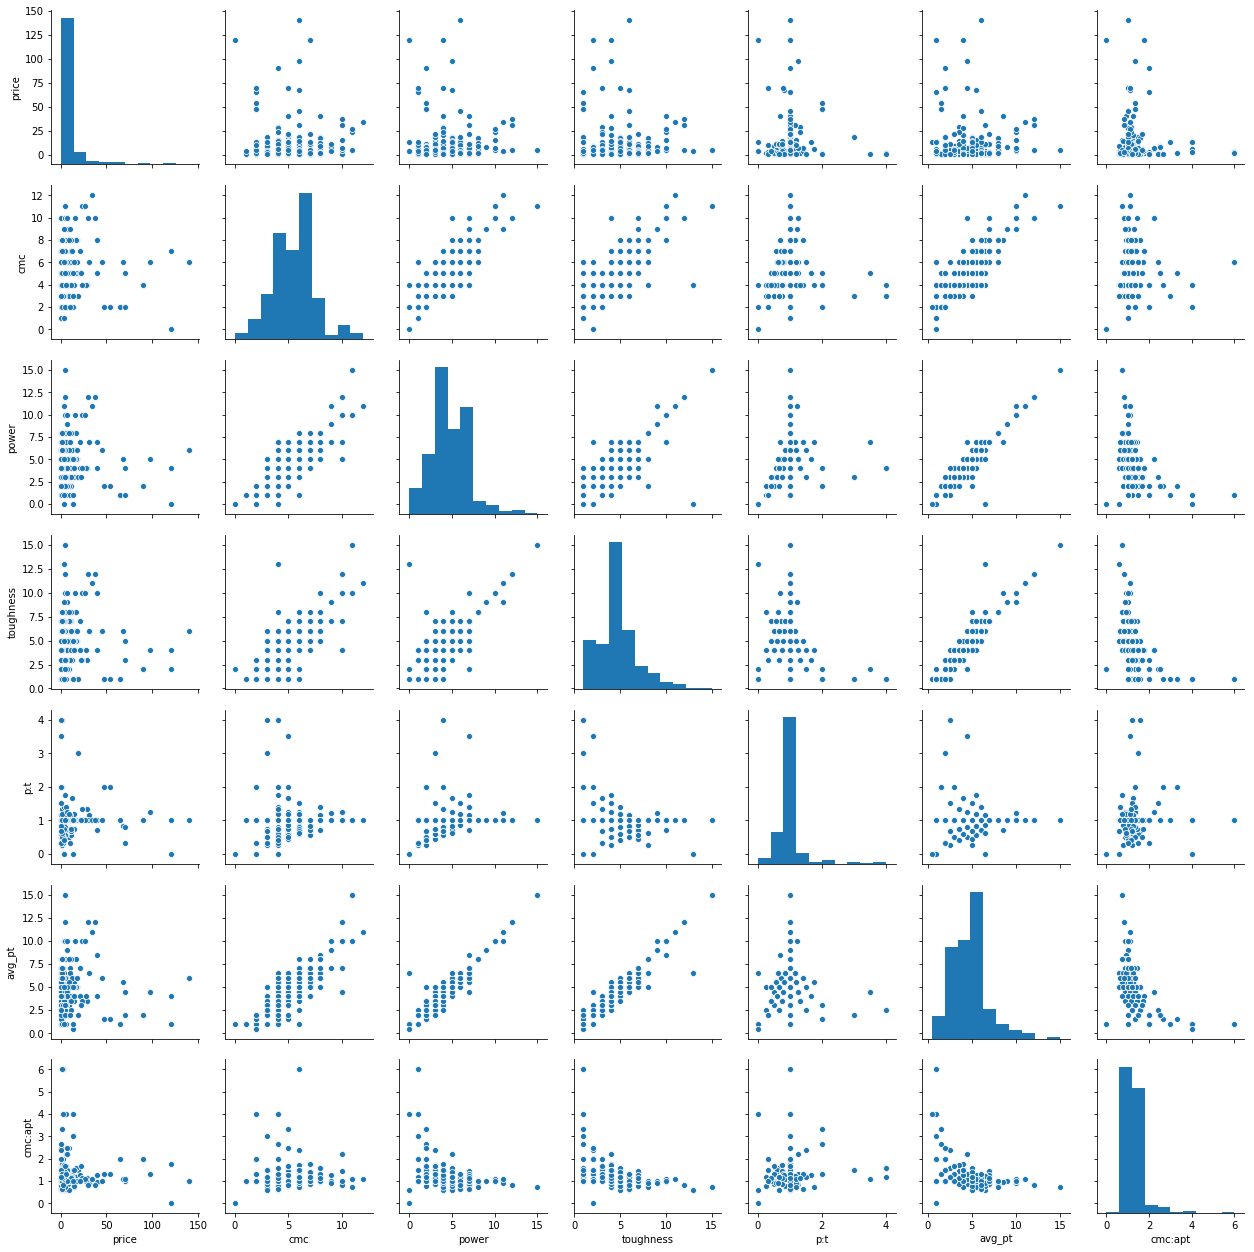

In [17]:
features = ['price','cmc','power','toughness','p:t','avg_pt','cmc:apt']
sns.pairplot(perfected_form[perfected_form['pt_type']=='static'][features].astype(float))

In [18]:
perfected_form[perfected_form['price']>100][['cardname','setname','price','timestamp']]

,cardname,setname,price,timestamp
165,Wurmcoil Engine,Kaladesh Inventions,140.0,1528417917077
168,Sword of War and Peace,Kaladesh Inventions,120.0,1528417917077
173,Platinum Angel,Kaladesh Inventions,120.0,1529109117077
176,Paradox Engine,Kaladesh Inventions,115.0,1529083915410
177,Ornithopter,Kaladesh Inventions,120.0,1528417917077
178,Oblivion Stone,Kaladesh Inventions,105.0,1528417917077
181,Chalice of the Void,Kaladesh Inventions,204.5,1529109117069
183,Arcbound Ravager,Kaladesh Inventions,180.0,1528417917069
185,Sword of Fire and Ice,Kaladesh Inventions,170.0,1529070462264
186,Sword of Feast and Famine,Kaladesh Inventions,149.0,1528465662264


In [19]:
connection = connect_mystic()

http://gatherer.wizards.com/Pages/Card/Details.aspx?multiverseid=409796

http://gatherer.wizards.com/Pages/Card/Details.aspx?multiverseid=414346   

In [20]:
cards_df = pd.read_csv('data/all_vintage_cards.csv')
cards_df.rename(index=str, columns={"name": "cardname", "set_name": "setname"}, inplace=True)
cards_df.head()

C:\Users\alexg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,set,color_identity,colors,reprint,layout,legalities
0,ff92804a-0c62-4eb8-bbba-f1ca6f426b6e,"Urborg, Tomb of Yawgmoth",Ultimate Box Topper,Legendary Land,NaN,mythic,Each land is a Swamp in addition to its other ...,NaN,NaN,NaN,0.0,puma,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
1,5e63fd70-ca5b-45fd-b551-9ebe02410e9c,Stirring Wildwood,Ultimate Box Topper,Land,NaN,mythic,Stirring Wildwood enters the battlefield tappe...,NaN,NaN,NaN,0.0,puma,"['G', 'W']",[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
2,54f41726-e0bb-4154-a2db-4b68b50f5032,Raging Ravine,Ultimate Box Topper,Land,NaN,mythic,Raging Ravine enters the battlefield tapped.\r...,NaN,NaN,NaN,0.0,puma,"['G', 'R']",[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
3,7c9fb3d9-e018-4aa3-9c14-1a51fae176b4,Lavaclaw Reaches,Ultimate Box Topper,Land,NaN,mythic,Lavaclaw Reaches enters the battlefield tapped...,NaN,NaN,NaN,0.0,puma,"['B', 'R']",[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
4,ff790ded-af9f-4e93-84b7-ddadff5ccad4,Karakas,Ultimate Box Topper,Legendary Land,NaN,mythic,{T}: Add {W}.\r\n{T}: Return target legendary ...,NaN,NaN,NaN,0.0,puma,['W'],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."


### Ready for Mythic MVP

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [24]:
raw_mythic = pd.read_csv('data/all_vintage_cards-mythic_recent.csv')
raw_mythic.drop(columns='Unnamed: 0', inplace=True)
raw_mythic.set_index('id', inplace=True)

raw_mythic = raw_mythic[(raw_mythic['setname']!='Kaladesh Inventions') & (raw_mythic['setname']!='Zendikar Expeditions')]

abberant_researcher = CreatureFeatureTransformer()
planeswalker = PlaneswalkerTransformer()
raw_mythic_eng = aberrant_researcher.transform(raw_mythic)
raw_mythic_eng = planeswalker.transform(raw_mythic_eng)
raw_mythic_eng.head(10)

,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,...,reprint,layout,legalities,timestamp,price,pt_type,p:t,avg_pt,cmc:apt,l_type
id,,,,,,,,,,,,,,,,,,,,,
ba9d2384-5c3f-4eb1-86b4-26ee13f1c767,"Chandra, Bold Pyromancer",Dominaria,Legendary Planeswalker — Chandra,{4}{R}{R},mythic,"+1: Add {R}{R}. Chandra, Bold Pyromancer deals...",0,0,5,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1541350580379,5.0,none,NaN,NaN,NaN,static
eb2b7388-ac6b-45c0-a5cc-da6450724b59,"Teferi, Timebender",Dominaria,Legendary Planeswalker — Teferi,{4}{W}{U},mythic,+2: Untap up to one target artifact or creatur...,0,0,5,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780379,5.0,none,NaN,NaN,NaN,static
d4581fc0-551c-4ee5-bde0-65c2b8cdf1b7,Weatherlight,Dominaria,Legendary Artifact — Vehicle,{4},mythic,Flying\r\r\nWhenever Weatherlight deals combat...,4,5,0,4.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780377,0.5,static,0.8,4.5,0.888889,variable
66024e69-ad60-4c9a-a0ca-da138d33ad80,Mox Amber,Dominaria,Legendary Artifact,{0},mythic,{T}: Add one mana of any color among legendary...,0,0,0,0.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780376,6.8,none,NaN,NaN,NaN,variable
5d10b752-d9cb-419d-a5c4-d4ee1acb655e,"Teferi, Hero of Dominaria",Dominaria,Legendary Planeswalker — Teferi,{3}{W}{U},mythic,+1: Draw a card. At the beginning of the next ...,0,0,4,5.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,47.0,none,NaN,NaN,NaN,static
c654737d-34ac-42ff-ae27-3a3bbb930fc1,"Muldrotha, the Gravetide",Dominaria,Legendary Creature — Elemental Avatar,{3}{B}{G}{U},mythic,"During each of your turns, you may play up to ...",6,6,0,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,3.5,static,1.0,6.0,1.000000,variable
73cf8c6b-1322-4bc5-a604-6e372607fae4,"Jhoira, Weatherlight Captain",Dominaria,Legendary Creature — Human Artificer,{2}{U}{R},mythic,"Whenever you cast a historic spell, draw a car...",3,3,0,4.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,1.4,static,1.0,3.0,1.333333,variable
9459ffca-5a1f-4641-88d4-8a499b261faa,Darigaaz Reincarnated,Dominaria,Legendary Creature — Dragon,{4}{B}{R}{G},mythic,"Flying, trample, haste\r\r\nIf Darigaaz Reinca...",7,7,0,7.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780373,0.4,static,1.0,7.0,1.000000,variable
5233ad7b-2903-4736-b13a-5cd4a275eb61,"Multani, Yavimaya's Avatar",Dominaria,Legendary Creature — Elemental Avatar,{4}{G}{G},mythic,"Reach, trample\r\r\nMultani, Yavimaya's Avatar...",0,0,0,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780372,1.7,variable,NaN,NaN,NaN,variable


In [25]:
raw_mythic_eng['reprint'] = 1*raw_mythic_eng['reprint']
clean_mythic_eng = raw_mythic_eng.fillna(value=-1)
clean_mythic_eng = pd.get_dummies(clean_mythic_eng, columns=['rarity','layout','pt_type','l_type'], prefix='mvp')
drop_features = ['cardname','setname','type_line','mana_cost','oracle_text','set','colors','color_identity','legalities','timestamp','price']

y = clean_mythic_eng['price']
X = clean_mythic_eng.drop(columns=drop_features)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

gbr = GradientBoostingRegressor()
MVP_model = gbr.fit(X_train,y_train)

In [27]:
y_pred = MVP_model.predict(X_test)

results_df = X_test.merge(clean_mythic_eng, left_index=True, right_index=True)
results_df['pred'] = y_pred
results_df['actual'] = y_test
results_df['diff'] = np.abs(y_pred-y_test)

results_df.head()
results_df[['cardname','pred','actual','diff']].sample(10)

,cardname,pred,actual,diff
id,,,,
cd114ec3-d286-4c70-a122-3043bc53cc88,Batterskull,3.764542,16.3,12.535458
2344e710-4570-41b6-af84-a3e7d784003a,Dovin Baan,14.706774,1.4,13.306774
05cf51d8-9f91-42ff-99e9-4397f2251c20,Dark Confidant,46.938988,47.5,0.561012
199d862e-d043-47f1-b097-76877b260608,Thraximundar,5.856280,0.8,5.056280
2c057ca8-9811-4dc3-9b0e-f9f69f752d1d,"Gideon, Martial Paragon",6.488978,5.0,1.488978
78c2bfef-06a5-4c7f-8283-ea3fb673b7a1,"Elesh Norn, Grand Cenobite",3.508354,11.5,7.991646
c219dd22-433c-4f6a-a0c4-fae12239291c,"Yidris, Maelstrom Wielder",6.765474,2.7,4.065474
c9850489-c056-4b17-8743-a5b514d8edf4,Cast Through Time,3.319176,2.5,0.819176
4a53752c-5689-4939-9a8b-bf59d88d7c6b,Ashcloud Phoenix,5.741734,0.2,5.541734


In [28]:
feature_imporances = np.array([list(X.columns), list(MVP_model.feature_importances_)]).T
feature_imporances[feature_imporances[:,1].argsort()[::-1]]

array([['cmc', '0.3444011965270878'],
       ['loyalty', '0.1417276591720825'],
       ['p:t', '0.1022335667563096'],
       ['cmc:apt', '0.09371637858510612'],
       ['reprint', '0.0811131802701614'],
       ['avg_pt', '0.06929088482483849'],
       ['toughness', '0.06359782033983062'],
       ['mvp_variable', '0.05811236544576461'],
       ['power', '0.04050768273941438'],
       ['mvp_static', '0.002714926498924856'],
       ['mvp_static', '0.0010868991111829462'],
       ['mvp_none', '0.0008243217110504264'],
       ['mvp_variable', '0.0006731180182462813'],
       ['mvp_leveler', '0.0'],
       ['mvp_normal', '0.0'],
       ['mvp_saga', '0.0'],
       ['mvp_mythic', '0.0']], dtype='<U21')

### Try fitting model to rares

In [29]:
raw_rare = pd.read_csv('data/all_vintage_cards-rare_recent.csv')
raw_rare.drop(columns='Unnamed: 0', inplace=True)
raw_rare.drop_duplicates(inplace=True)
raw_rare.set_index('id', inplace=True)

raw_rare = raw_rare[(raw_rare['setname']!='Kaladesh Inventions') & (raw_rare['setname']!='Zendikar Expeditions') & (raw_rare['setname']!='Portal Three Kingdoms')]

abberant_researcher = CreatureFeatureTransformer()
planeswalker = PlaneswalkerTransformer()
raw_rare_eng = aberrant_researcher.transform(raw_rare)
raw_rare_eng = planeswalker.transform(raw_rare_eng)
raw_rare_eng.head(10)

raw_rare_eng['reprint'] = 1*raw_rare_eng['reprint']
clean_rare_eng = raw_rare_eng.fillna(value=-1)
clean_rare_eng = pd.get_dummies(clean_rare_eng, columns=['rarity','layout','pt_type','l_type'], prefix='mvp')
drop_features = ['cardname','setname','type_line','mana_cost','oracle_text','set','colors','color_identity','legalities','timestamp','price']

y = clean_rare_eng['price']
X = clean_rare_eng.drop(columns=drop_features)

X_train, X_test, y_train, y_test = train_test_split(X, y)

gbr = GradientBoostingRegressor()
MVP_model = gbr.fit(X_train,y_train)

y_pred = MVP_model.predict(X_test)

results_df = X_test.merge(clean_rare_eng, left_index=True, right_index=True)
results_df['pred'] = y_pred
results_df['actual'] = y_test
results_df['diff'] = np.abs(y_pred-y_test)

results_df.head()
results_df[['cardname','pred','actual','diff']].sample(10)

,cardname,pred,actual,diff
id,,,,
d35674a0-2704-46d0-8eba-dd06251abfea,Azorius Guildmage,0.510203,2.0,1.489797
7fe593eb-df3c-43e5-97a6-418f91e87cb3,Parallax Tide,10.205415,1.1,9.105415
6c3fe038-a982-4cbf-a158-c45fdc3d727e,Jace's Sanctum,10.205415,0.9,9.305415
b0747b12-c75a-4fdf-a881-f2383a23ccdd,Luminate Primordial,1.164669,0.1,1.064669
60e16d94-1166-4050-8554-686e153a7f80,"Baral, Chief of Compliance",7.403926,5.0,2.403926
7441e7f9-a326-4f61-b7b1-e0dbed06046f,Voidmage Prodigy,2.438429,4.0,1.561571
3c16915b-c50d-4fb5-830f-9ca4597a9c0f,Sliver Overlord,2.697956,13.0,10.302044
7a8318bb-bc3c-45e9-bd57-60ae72b6f8b0,Kyren Toy,8.358083,0.4,7.958083
ece3bcdd-cb33-4923-b919-ba57a327d3cd,Breeding Pool,8.023001,10.9,2.876999


In [30]:
feature_importances = np.array([list(X.columns), list(MVP_model.feature_importances_)]).T
feature_importances[feature_imporances[:,1].argsort()[::-1]]

array([['cmc', '0.24220810299855064'],
       ['loyalty', '0.0'],
       ['p:t', '0.1480254275019478'],
       ['cmc:apt', '0.32453085161511125'],
       ['reprint', '0.0630245068423852'],
       ['avg_pt', '0.06330160886449997'],
       ['toughness', '0.07445602075496664'],
       ['mvp_variable', '0.017537891881983188'],
       ['power', '0.056875670933592824'],
       ['mvp_static', '0.0'],
       ['mvp_static', '0.0'],
       ['mvp_none', '0.00026015541120977763'],
       ['mvp_variable', '0.0'],
       ['mvp_leveler', '0.0'],
       ['mvp_normal', '0.006795073763271991'],
       ['mvp_saga', '0.002984689432480834'],
       ['mvp_rare', '0.0']], dtype='<U22')

### PIPELINING

In [33]:
from sklearn.pipeline import Pipeline
from model.master_transmuter import *
from model.models import *

In [34]:
raw_mythic = pd.read_csv('data/all_vintage_cards-mythic_recent.csv')

# drop sets, drop duplicates, set indices
X, y = csv_cleaner(raw_mythic)

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = Pipeline([
    ('CreatureFeature', CreatureFeatureTransformer()),
    ('Planeswalker', PlaneswalkerTransformer()),
    ('BoolToInt', BoolTransformer()),
    ('Fillna', FillTransformer()),
    ('DeriveFeatures', DeriveFeaturesTransformer()),
    ('DropFeatures', DropFeaturesTransformer()),
    ('CreateDummies', CreateDummiesTransformer()),
    ('TestFill', TestFillTransformer()),
    ('GradientBoostingRegressor', GradientBoostingRegressor())
])

y_train_log = np.log(y_train) 
y_test_log = np.log(y_test)

pipe.fit(X_train, y_train_log)
y_pred_log = pipe.predict(X_test)
y_pred = price_corrector(np.exp(y_pred_log))

In [35]:
results_df = X_test.copy()
results_df['pred'] = y_pred
results_df['actual'] = y_test
results_df['log_diff'] = np.abs(np.log(y_pred+1) - np.log(y_test+1))
score = log_score(y_pred, y_test)
print('Model log score: {}'.format(score))
results_df[['cardname','pred','actual','log_diff']].sort_values('log_diff').head(10)

Model log score: 0.8670829643137875


,cardname,pred,actual,log_diff
id,,,,
aee68b52-6377-419b-b772-2af1e57cbe5d,Abyssal Persecutor,1.2,1.2,0.000000
00d03b17-75ae-40d2-8570-b219ef0dfd4a,Mindslaver,4.2,4.3,0.019048
d7c6614c-cc2b-4e5b-9c0d-ce8e4b2d8ea7,"Tezzeret, Master of Metal",4.1,4.2,0.019418
bbaaa98a-ec40-4ff1-8762-a719cf1c475d,"Nissa, Vital Force",4.0,3.9,0.020203
deeb989b-aff4-4232-9ae1-c4f73dacf728,"Wrexial, the Risen Deep",1.6,1.7,0.037740
240f10df-2115-4db3-aab6-731a413e074d,Thromok the Insatiable,1.6,1.5,0.039221
4816d092-e34b-4397-8599-43d8e85a8f39,Narset Transcendent,7.6,8.0,0.045462
ca204351-7a7e-4e4b-8c2b-f90fa0f9d724,Vizier of the Menagerie,3.3,3.1,0.047628
64733f34-2eb4-4df5-8656-57bdb8b3a983,Novablast Wurm,1.1,1.0,0.048790


In [37]:
feature_importances = pipe.named_steps['GradientBoostingRegressor'].feature_importances_


In [38]:
rarity = 'mythic'
raw_df = pd.read_csv('data/all_vintage_cards-{}_recent.csv'.format(rarity))

# drop sets, drop duplicates, set indices
X, y = csv_cleaner(raw_df)
# y = y*100
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

mythic basic pipeline score: 0.8916827729264478


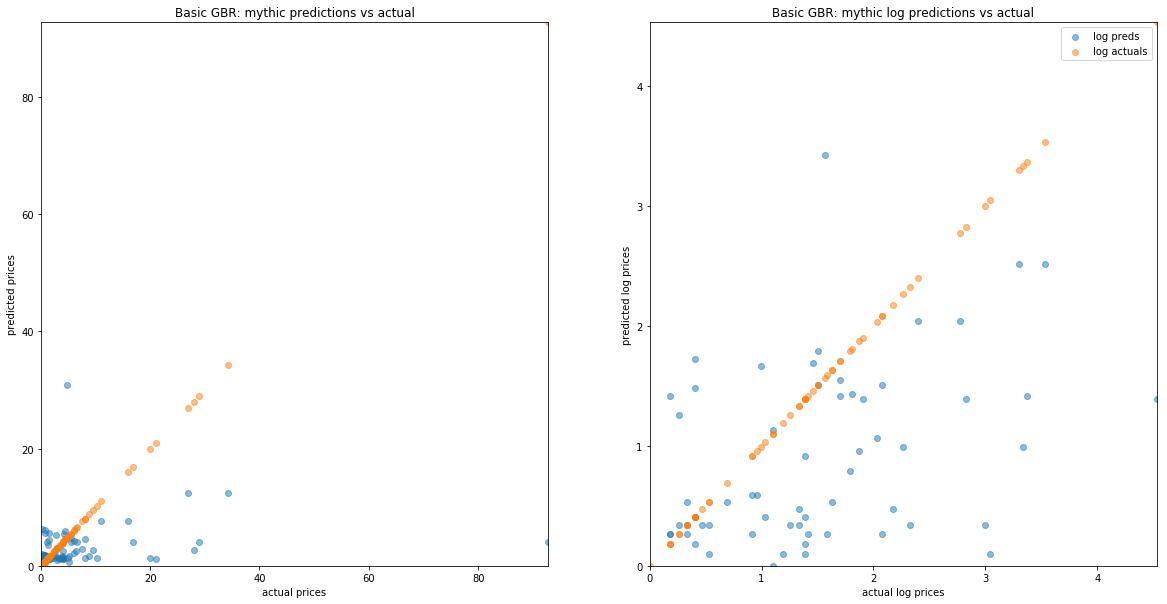

In [39]:
pipe, results_df, score = fit_basic_pipeline(X_train, X_test, y_train, y_test)
print('{0} basic pipeline score: {1}'.format(rarity,score))
plot_residuals(results_df['y_pred'],results_df['y_test'], 'Basic GBR: '+rarity)

mythic basline (log mean) score: 0.9588891840024644


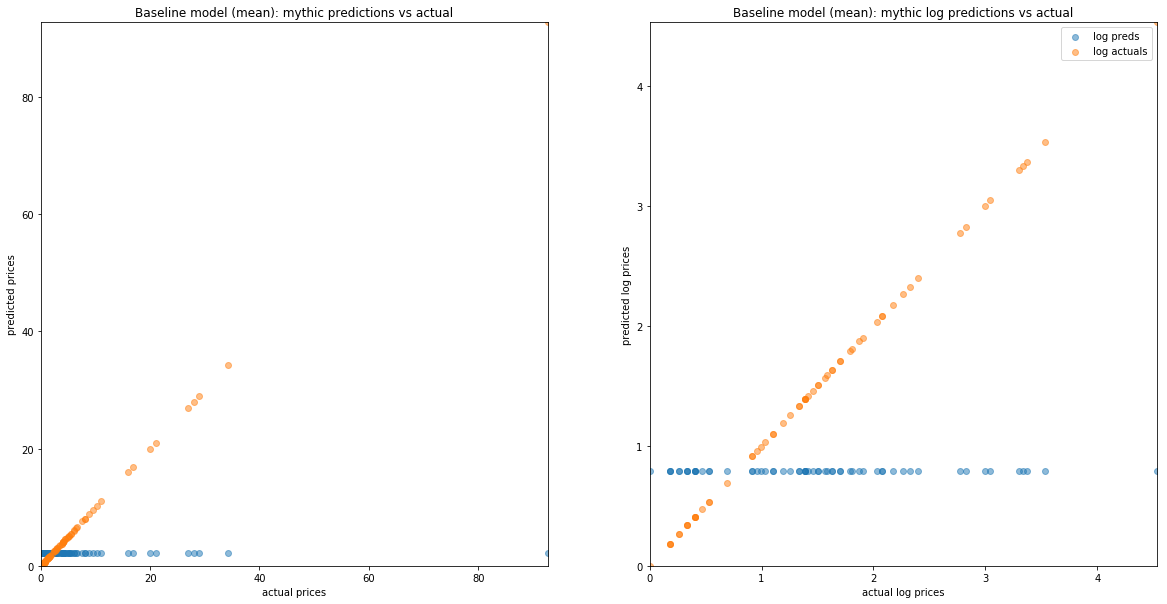

In [40]:
dummy_results_df, score = baseline_model(X_train, X_test, y_train, y_test)
print('{0} basline (log mean) score: {1}'.format(rarity,score))
plot_residuals(dummy_results_df['y_pred'],dummy_results_df['y_test'], 'Baseline model (mean): '+rarity)

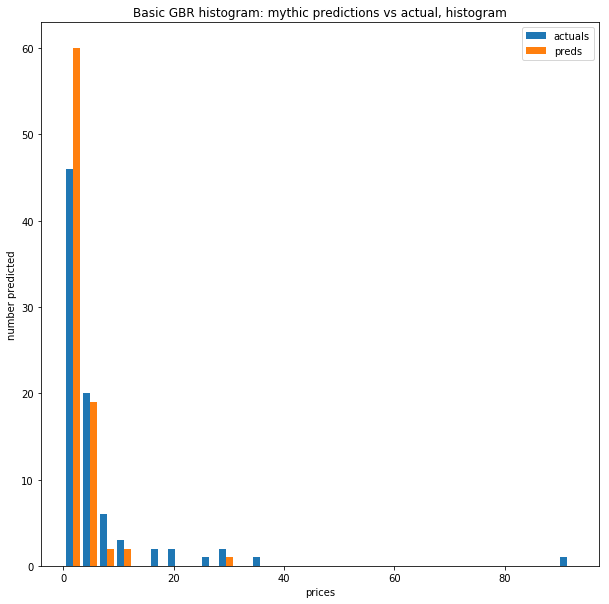

In [41]:
plot_pred_hist(results_df['y_pred'],results_df['y_test'], 'Basic GBR histogram: '+rarity)

In [42]:
results_df[['cardname','setname','y_pred','y_test','log_diff']].sort_values('log_diff', ascending=False).head(10)

,cardname,setname,y_pred,y_test,log_diff
id,,,,,
0e606072-a3aa-4300-ba90-ec92a721fa76,"Jace, the Mind Sculptor",Worldwake,4.0,92.8,2.931727
7956a90f-e27b-4d5a-bc23-70e878b2dfeb,"Karrthus, Tyrant of Jund",Alara Reborn,1.1,21.0,2.349105
d134385d-b01c-41c7-bb2d-30722b44dc5a,History of Benalia,Dominaria,1.4,20.0,2.169054
c34ae834-775e-447a-a330-0270c227c667,"Atraxa, Praetors' Voice",Commander 2016,2.7,28.0,2.058963
daccec32-84c6-4de4-9b00-c497a6ba5de8,Rekindling Phoenix,Rivals of Ixalan,4.1,29.0,1.771957
94002868-a48a-4ea8-bfce-17257078f5db,Ugin's Nexus,Khans of Tarkir,6.3,0.3,1.725510
f06fc6e0-b22c-40d3-bb53-d5ec400d921c,"Kozilek, the Great Distortion",Oath of the Gatewatch,30.8,4.8,1.701608
fbf60d69-fc68-4b23-a9e8-9d310c00a865,Lord of Extinction,Alara Reborn,1.4,10.2,1.540445
8d171b46-69e7-4e39-b3b2-97ed022cd933,Chromanticore,Born of the Gods,6.1,0.7,1.429467
